# Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn import svm
from pathlib import Path
import os
import random

In [2]:
labels = pd.read_csv("C:/Users/jaiga/Desktop/pokemon_classification/Train/train.csv")
labels.head()

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu


In [3]:
p = Path("C:/Users/jaiga/Desktop/pokemon_classification/Train/")
dirs = p.glob("*")
image_data = []
label_data = []
for folder_dir in dirs:
    for img_path in folder_dir.glob("*.jpg"):
        file_name = str(img_path).split("\\")[-1]
        img = image.load_img(img_path, target_size = (100,100))
        image_array = image.img_to_array(img)
        image_data.append(image_array)
        label_data.append(labels[labels['ImageId'] == file_name]['NameOfPokemon'].values[0])

C:\Users\jaiga\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


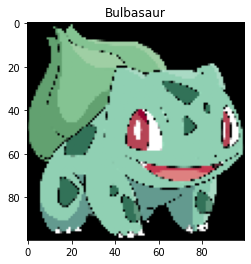

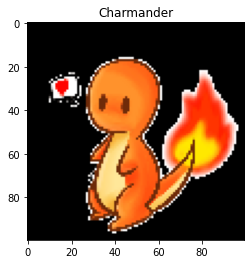

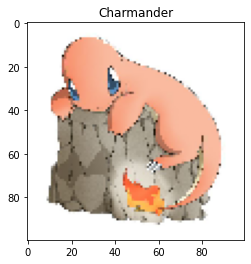

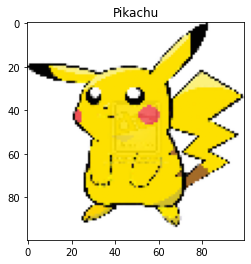

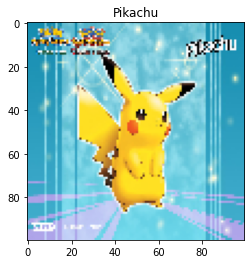

In [4]:
image_data = np.array(image_data, dtype = 'float32')/255.0
label_data = np.array(label_data)

combined = list(zip(image_data, label_data))
random.shuffle(combined)
image_data[:], label_data[:] = zip(*combined)

for i in range(5):
    plt.imshow(image_data[i])
    plt.title(label_data[i])
    plt.show()

# SVM Classifier

In [5]:
class SVM:
    def __init__(self, C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def HingeLoss(self, X,W,Y,b):
        loss = 0.0
        loss += 0.5 * np.dot(W, W.T)
        m = X.shape[0]
        for i in range(m):
            ti = Y[i] * (np.dot(W,X[i].T)+b)
            loss += self.C * max(0, 1-ti)
        return loss[0][0]
    
    def fit(self, X,Y, batch_size = 100, learning_rate = 0.001, maxItr = 300):
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        W = np.zeros((1, no_of_features))
        c = self.C
        bias = 0
        losses = []
        for i in range(maxItr):
            l = self.HingeLoss(X,W,Y,bias)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            for batch_start in (0, no_of_samples, batch_size):
                gradw = 0.0
                gradb = 0.0
                for j in range(batch_start, batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W, X[i].T)+bias)
                        if ti>1:
                            gradw += 0.0
                            gradb += 0.0
                        else:
                            gradw += c*X[i]*Y[i]
                            gradb += c*Y[i]
                            
                W = W - n*W + n*gradw
                bias = bias + n*gradb
            
        self.W = W
        self.b = bias
        return W, bias, losses
        

In [6]:
svm_ob = SVM(C = 10000.0)

In [7]:
classes = np.unique(label_data)

In [8]:
SVM_Params = []

In [ ]:

for i in classes:
    m = image_data.shape[0]
    X = image_data.reshape((m,-1))
    Y = np.ones((m,))
    Y[label_data != i] = -1
    wts, b, loss = svm_ob.fit(X, Y, learning_rate = 0.000001, maxItr=3000)
    SVM_Params.append((wts, b))

In [ ]:
Y_dis = []
m = image_data.shape[0]
X = image_data.reshape((m,-1))
for i in range(m):
    x = X[i]
    y_dis = []
    for j in range(len(SVM_Params)):
        wts, b = SVM_Params[j]
        c_dis = np.dot(wts, x.T) + b
        c_dis = c_dis[0]
        y_dis.append(c_dis)
    Y_dis.append(y_dis)

In [ ]:
Y_classes = []
for y in Y_dis:
    y_class = np.argmax(y)
    y_class = classes[y_class]
    Y_classes.append(y_class)

In [ ]:
Y_classes = np.array(Y_classes)
def accuracy(Y, Y_pred):
    ans = 0
    ans = np.sum([Y == Y_pred])
    return (ans/Y.shape[0]) * 100

accuracy(label_data, Y_classes)

In [ ]:
svm_classifier = svm.SVC(kernel='linear', C=10000.0)

In [ ]:
svm_classifier.fit(X, label_data)

In [ ]:
svm_classifier.score(X, label_data)

# Classifying with sklearn Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X, label_data)

In [ ]:
lr.score(X, label_data)

# Verifying with sklearn KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
knn.fit(X, label_data)

In [ ]:
knn.score(X, label_data)

In [ ]:
p = Path("C:/Users/jaiga/Desktop/pokemon_classification/Test (1)/")
dirs = p.glob("*")
test_image_data = []

for folder_dir in dirs:
    for img_path in folder_dir.glob("*.jpg"):
        file_name = str(img_path).split("\\")[-1]
        img = image.load_img(img_path, target_size = (100,100))
        image_array = image.img_to_array(img)
        test_image_data.append(image_array)
        

In [ ]:
test_image_data = np.array(test_image_data, dtype = 'float32')/255.0
for i in range(5):
    plt.imshow(test_image_data[i])
    plt.show()

In [ ]:
Y_dis = []
m = test_image_data.shape[0]
X = test_image_data.reshape((m,-1))
for i in range(m):
    x = X[i]
    y_dis = []
    for j in range(len(SVM_Params)):
        wts, b = SVM_Params[j]
        c_dis = np.dot(wts, x.T) + b
        c_dis = c_dis[0]
        y_dis.append(c_dis)
    Y_dis.append(y_dis)

In [ ]:
Y_classes = []
for y in Y_dis:
    y_class = np.argmax(y)
    y_class = classes[y_class]
    Y_classes.append(y_class)
Y_classes = np.array(Y_classes)

In [ ]:
Y_classes

In [ ]:
test_df = pd.read_csv("C:/Users/jaiga/Desktop/pokemon_classification/Test (1)/test.csv")

In [ ]:
test_df.head()

In [ ]:
Y_df = pd.DataFrame(data=Y_classes, columns=['NameOfPokemon'])
test_df = pd.concat([test_df, Y_df], axis=1 )
test_df.head(20)

In [ ]:
test_df.to_csv("PokemonClassifier", index=False)

In [ ]:
test_df

In [ ]:
test_pred = svm_classifier.predict(X)

In [ ]:
test_pred

In [ ]:
test_df['NameOfPokemon'] = test_pred

In [ ]:
test_df